# PROBLEM STATEMENT

* How accurately can we classify whether a sample from a body of water is potable or not potable, given its chemical and physical characteristics?

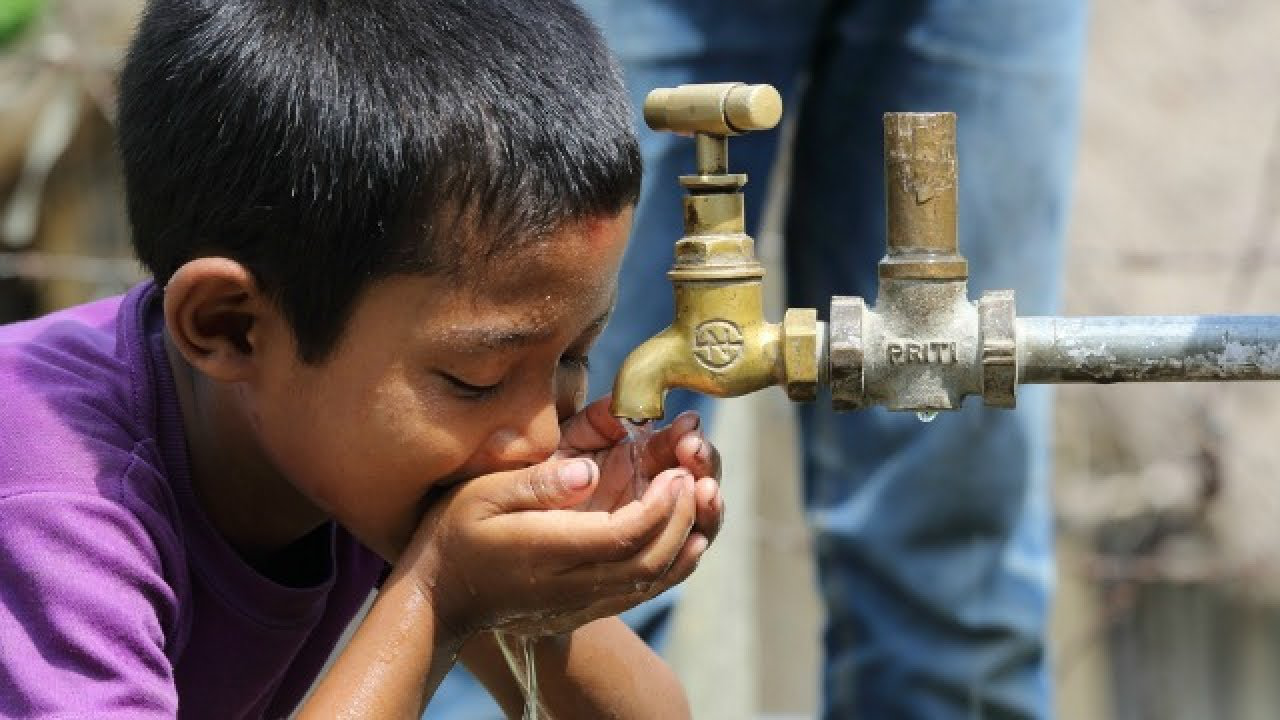

In [54]:
from PIL  import Image
img = Image.open('water_potability.jpg')
img

* The Below Columns Show For Better Understanding Of The Data

1.PH : Indicator of acidic or alkaline condition of water, ranging from 1 to 14.

Acceptable Limit: 6.5 to 8.5

2.Hardness : Capacity of water to precipitate soap in mg/L.

Acceptable Limit: Upto 500 or 600 mg/L

3.Solids : Total dissolved solids (TDS) in ppm. The water with high TDS value indicates that water is highly mineralized.

Acceptable Limit: 500 - 1000 ppm

4.Chloramines : Amount of Chloramines in ppm.

Acceptable Limit: Upto 4 ppm

5.Sulfate : Amount of Sulfates dissolved in water in mg/L.

Acceptable Limit: Upto 400 mg/L

6.Conductivity : Electrical conductivity of water in μS/cm.

Acceptable Limit: Upto 400 μS/cm

7.Organic_carbon : Amount of carbon in organic compounds in ppm.

Acceptable Limit: Less than 2 mg/L

8.Trihalomethanes: Amount of Trihalomethanes in μg/L.

Acceptable Limit: Upto 80 ppm

9.Turbidity: Measure of light emiting property of water in NTU.

Acceptable Limit: 5-10 NTU

10.Potability: Indicates if water is safe for human consumption.

Here Potable -1 and Not potable -0.



# DATA

In [55]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('new_water_potability.csv')

In [57]:
df

ph    Hardness       Solids  Chloramines     Sulfate  \
0     7.156857  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246  336.094350   
2     8.099124  224.236259  19909.54173     9.275884  330.449166   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  364.091541   
3273  9.419510  175.762646  33155.57822     7.350233  327.357588   
3274  5.126763  230.603758  11983.86938     6.303357  325.952434   
3275  7.874671  195.102299  17404.17706     7.509306  345.728296   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436525       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        64.327280   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [58]:
from math import floor,ceil
import tabulate as tb


In [59]:
l=[]
names=[]
for col in df.columns:
    names.append(col)
    l.append(f'{floor(df[col].min())} to {ceil(df[col].max())}')

tab = pd.DataFrame(list(zip(names,l)),columns =['Name', 'Range'])
print(tb.tabulate(tab, headers='keys', tablefmt='pretty'))

+---+-----------------+--------------+
|   |      Name       |    Range     |
+---+-----------------+--------------+
| 0 |       ph        |   0 to 14    |
| 1 |    Hardness     |  47 to 324   |
| 2 |     Solids      | 320 to 61228 |
| 3 |   Chloramines   |   0 to 14    |
| 4 |     Sulfate     |  129 to 482  |
| 5 |  Conductivity   |  181 to 754  |
| 6 | Organic_carbon  |   2 to 29    |
| 7 | Trihalomethanes |   0 to 124   |
| 8 |    Turbidity    |    1 to 7    |
| 9 |   Potability    |    0 to 1    |
+---+-----------------+--------------+


# EDA

# Handling Missing Values and Duplicates


In [60]:
#!pip install missingno
import missingno as msno


<Axes: >

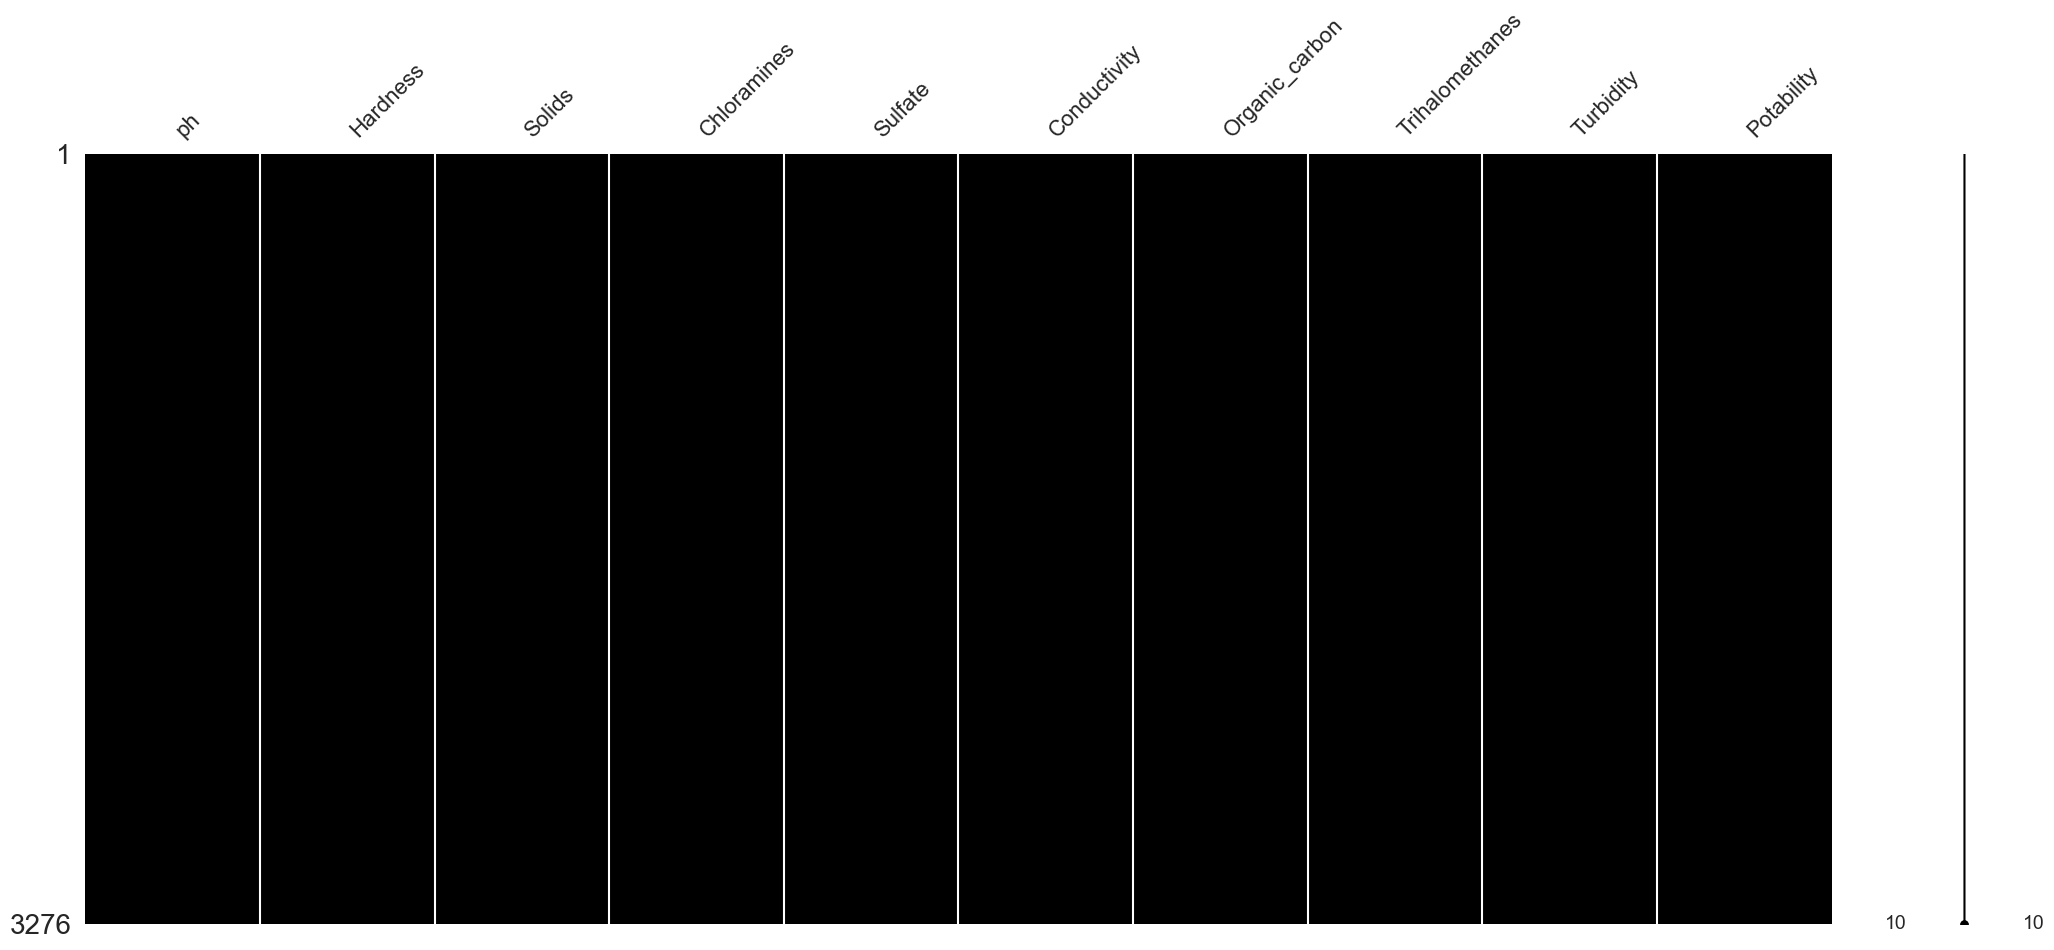

In [61]:
msno.matrix(df, color=(0, 0, 0))

In [62]:
df.isnull().sum()/len(df)

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

* ph feature have almost 15% of data missing.
* Sulfate feature have almost 24% of data missing.
* Trihalomethanes feature have almost 5% missing data.

In [63]:
from sklearn.impute import KNNImputer

* Here we are using knn imputer to treat missing values.
* Why knn:it is much more accurate than the mean,median,mode and other imputation methods.
* Why not mean/median/mode: it can introduce bias in the data.

In [64]:
imputer = KNNImputer(n_neighbors=5, weights="uniform",add_indicator=False)


In [65]:
data=imputer.fit_transform(df)


In [66]:
new=pd.DataFrame(data,columns=df.columns)

In [67]:
new.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.156857  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  336.094350    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  330.449166    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135         0.0  
1       15.180013        56.329076   4.500656         0.0  
2       16.868637        66.420093   3.055934         0.0  
3       18.436525       100.341674   4.628771         0.0  
4       11.558279        31.997993   4.075075         0.0

<Axes: >

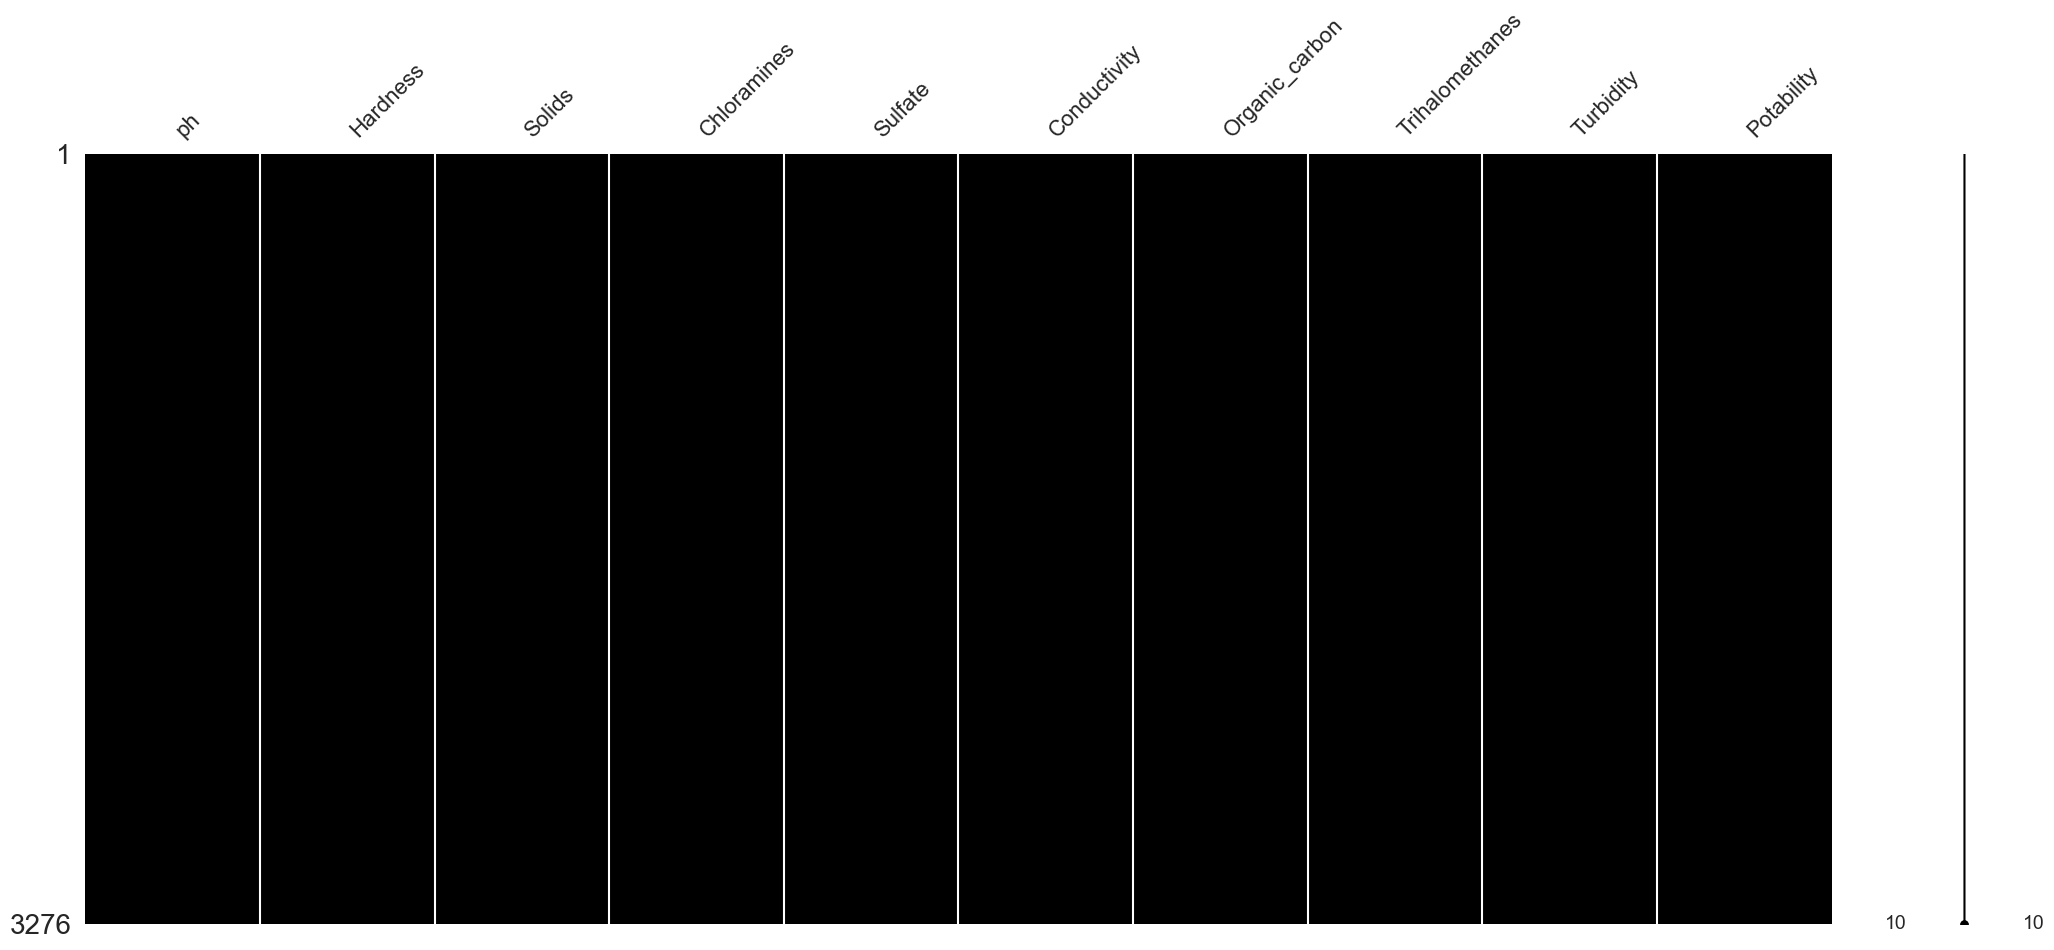

In [68]:
msno.matrix(new, color=(0, 0, 0))

* There Are No Null Values.

In [69]:
new[new.duplicated()]

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []

* There Are No Duplicated Values

# Visuvalization

In [70]:
import seaborn as sns

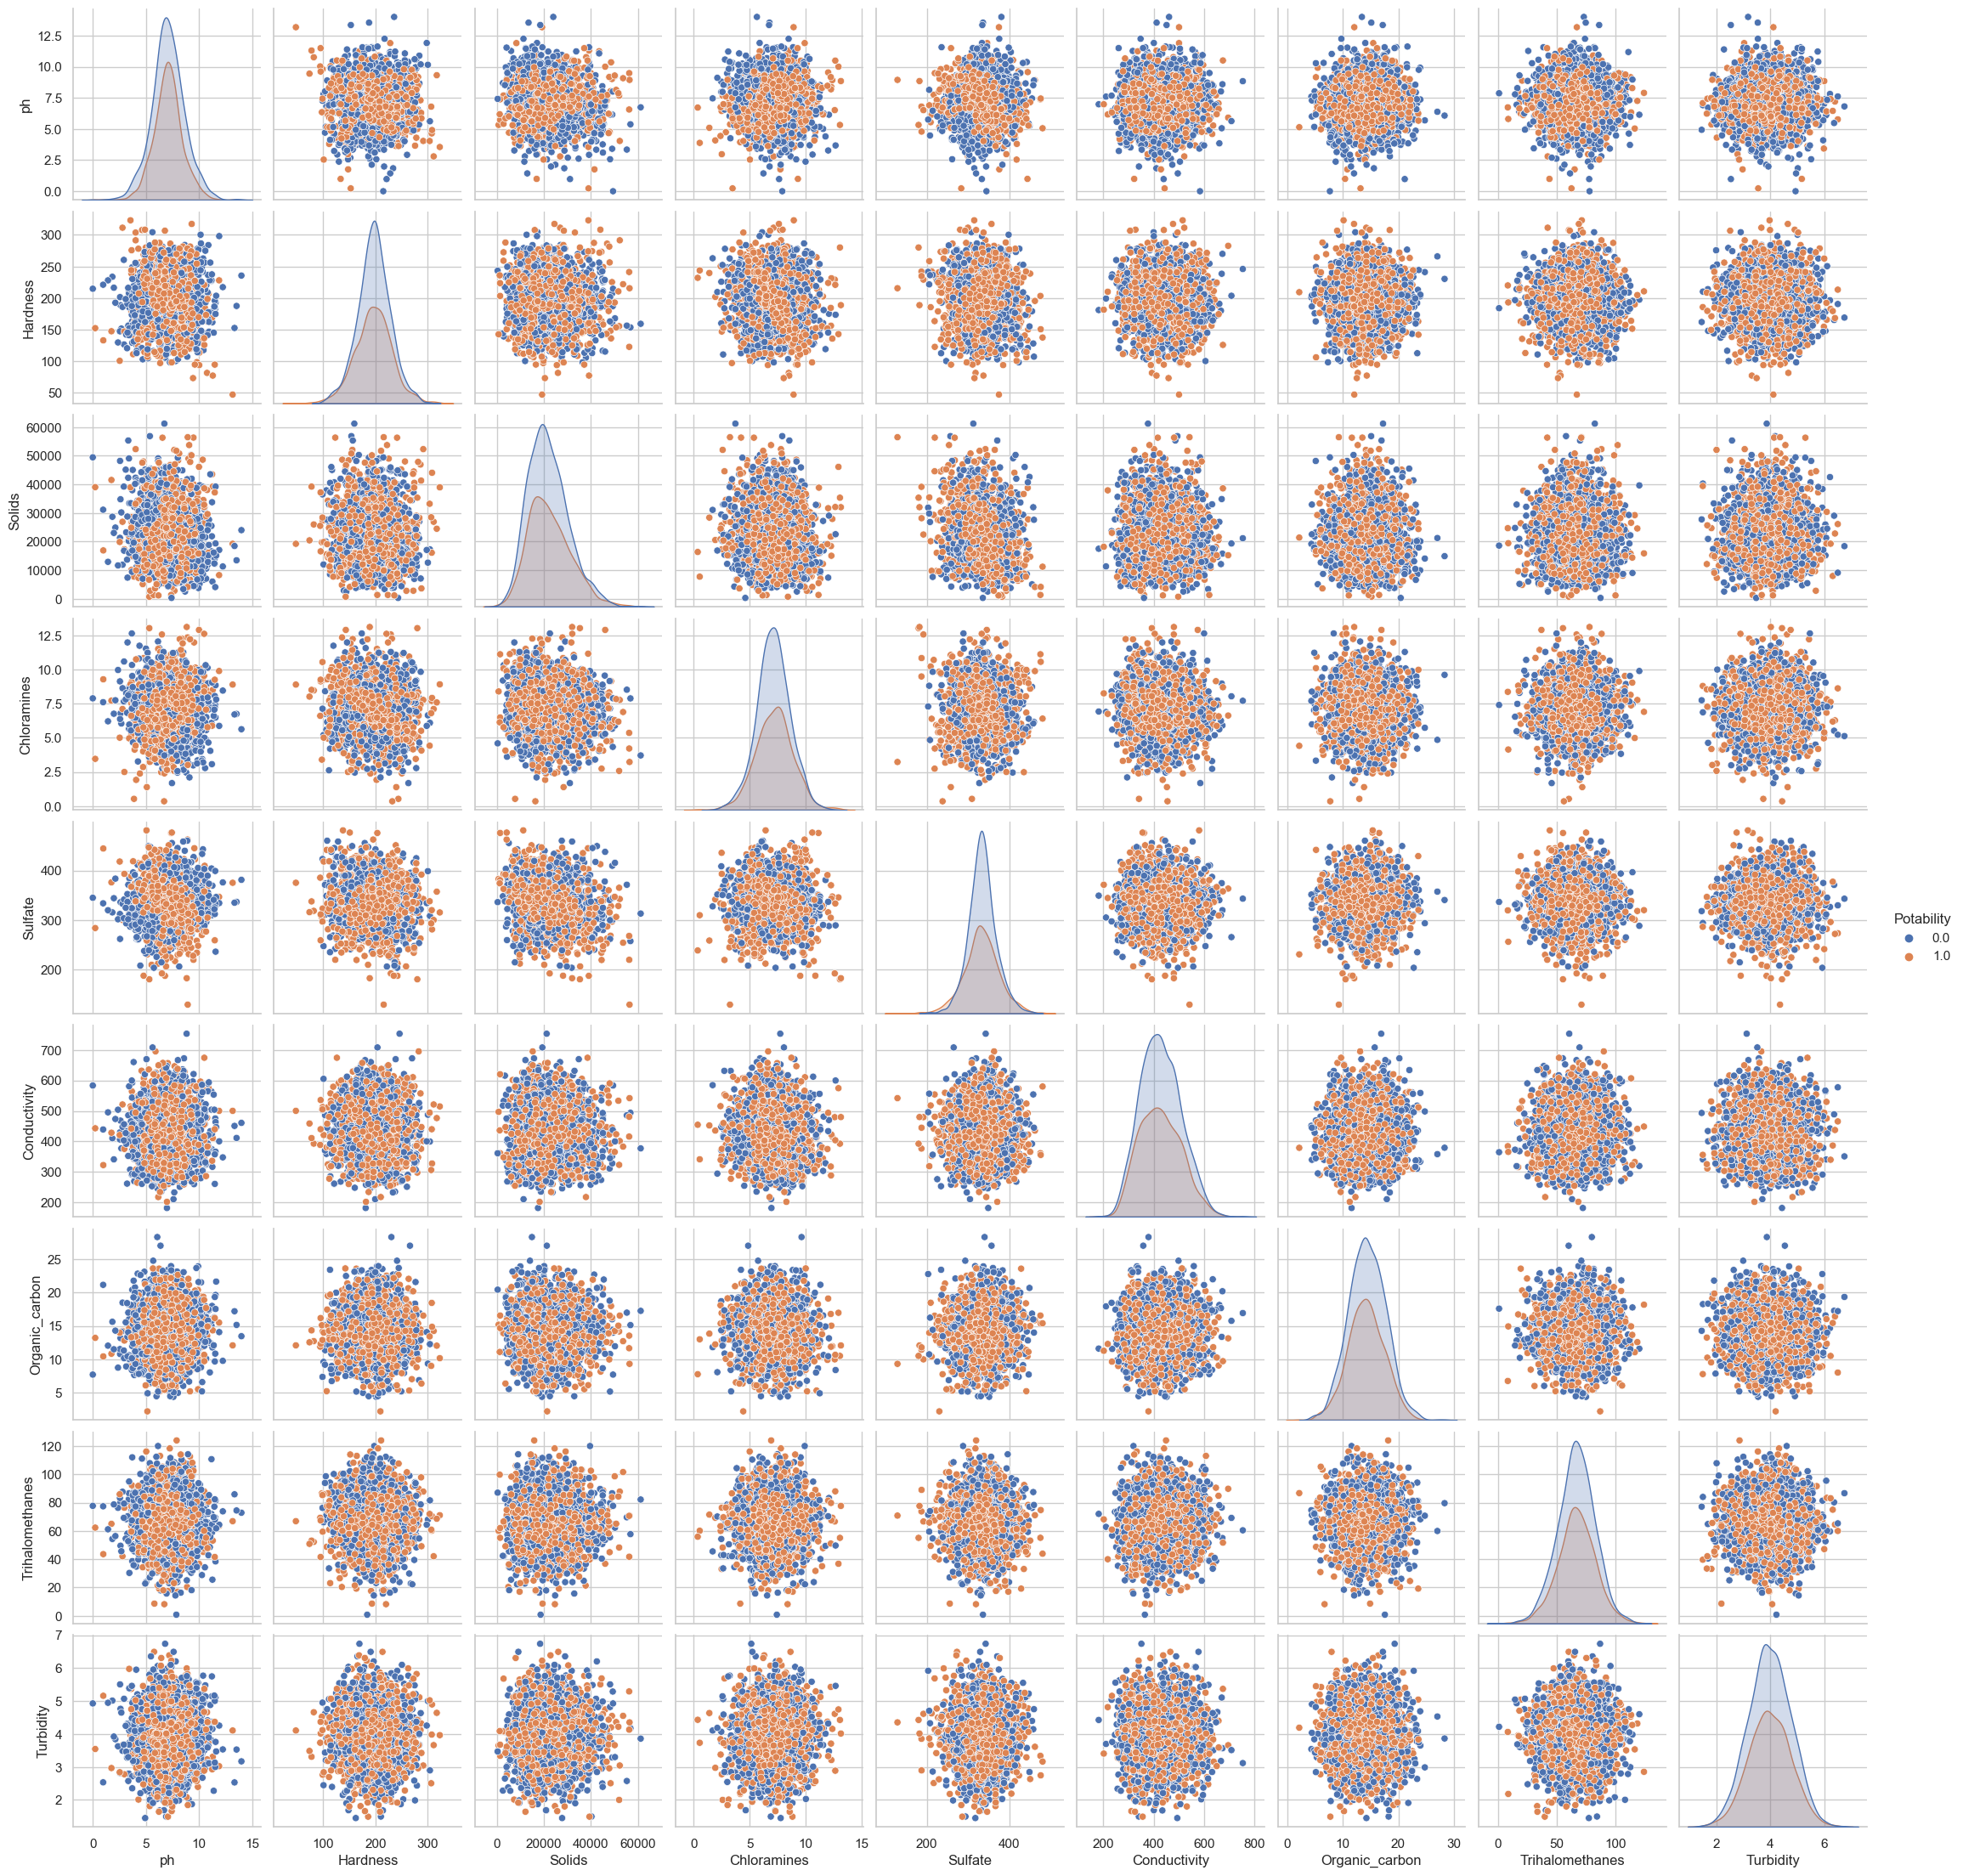

In [71]:
sns.pairplot(new,hue='Potability')

# Stats of data

In [72]:
new.describe().round(2).style.background_gradient(cmap='Blues')

In [73]:
import plotly.express as px


In [74]:
d = pd.DataFrame(new["Potability"].value_counts())
fig = px.pie(d, 
             values = "Potability", 
             names = ["Not Potable", "Potable"], 
             hole = 0.5, 
             opacity = 1.0, 
             labels = {"label" : "Potability", "Potability" : "Number of Samples"})

fig.update_layout(title = dict(text = "Pie Chart of Potability"))
fig.update_traces(textposition = "inside", textinfo = "percent+label")
fig.show()


In [75]:
d=new['Potability'].value_counts()
print(d)
print("1 means potable")
print("0 means Not potable")

0.0    1998
1.0    1278
Name: Potability, dtype: int64
1 means potable
0 means Not potable


# Skewness 

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

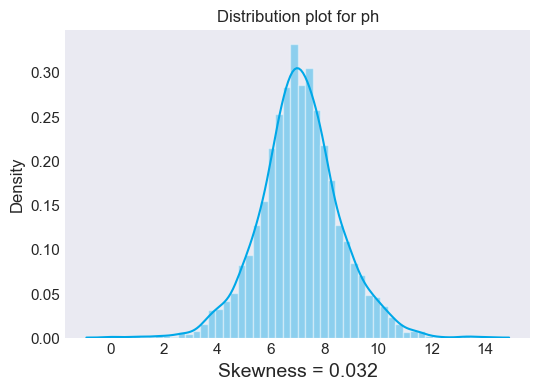

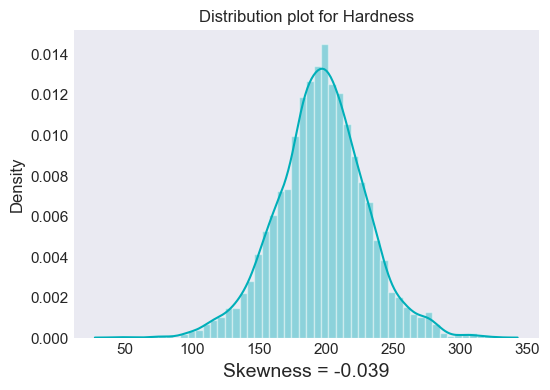

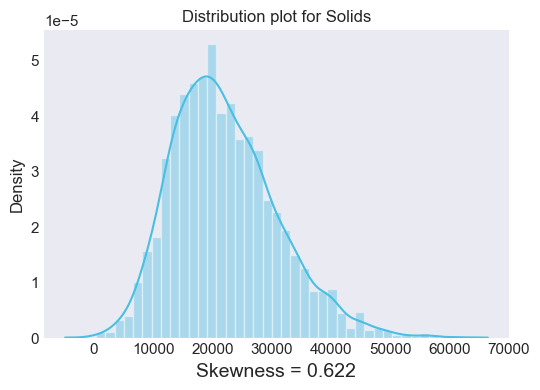

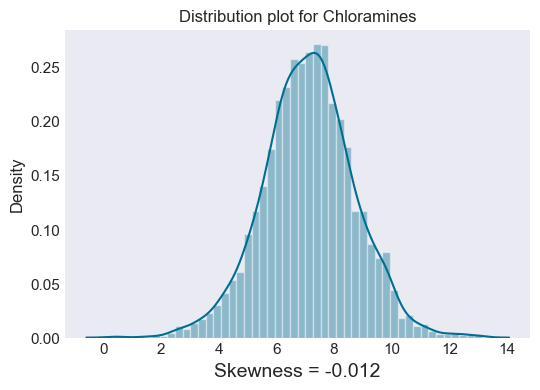

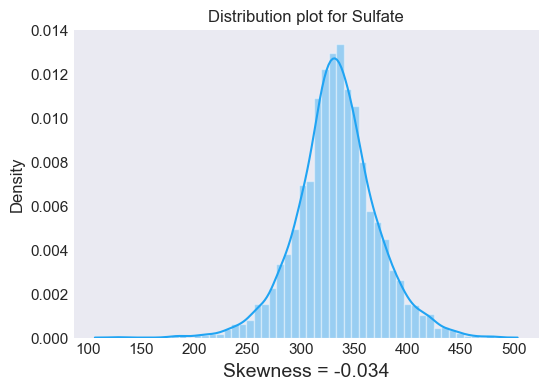

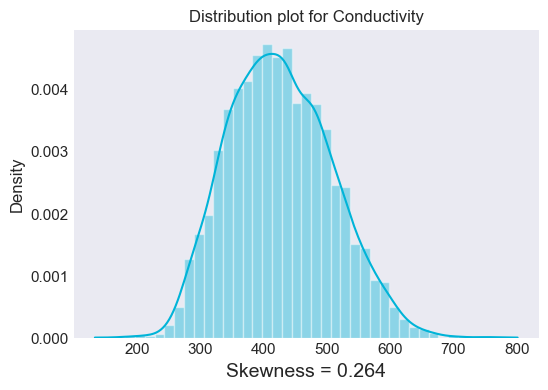

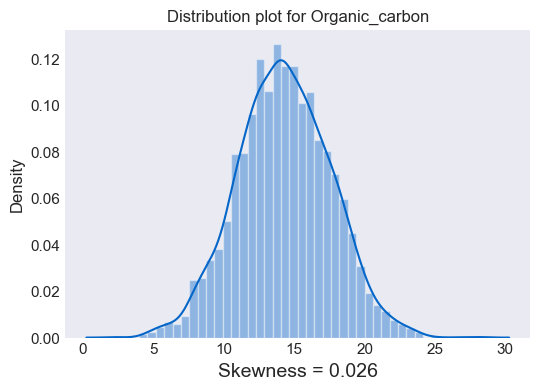

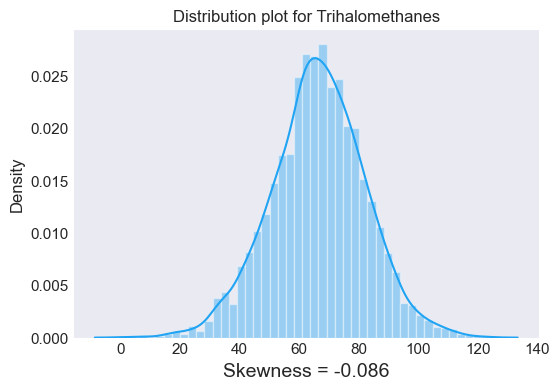

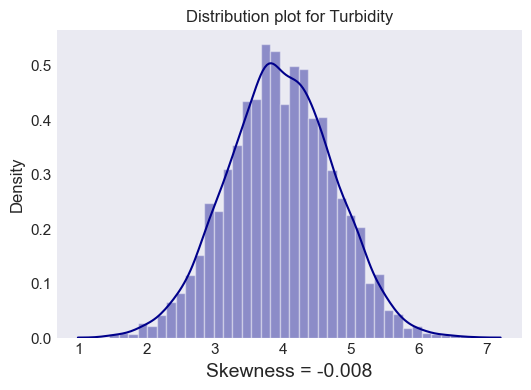

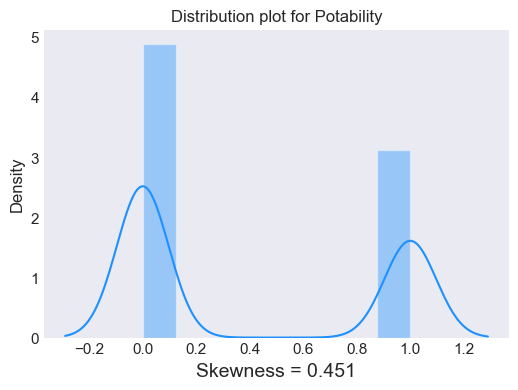

In [77]:
plt.style.use('seaborn-dark')
colors=['#00a8e8', '#00afb9',  '#48bfe3', '#006e90', '#20a4f3', '#00b4d8', '#0466c8', '#20a4f3', '#00008B','#1E90FF']
i=0
while i<10:
    for col in new.columns:
        plt.figure(figsize=(6,4))
        sns.distplot(df[col],color=colors[i % len(colors)])
        plt.title(f'Distribution plot for {col}')
        plt.xlabel(f'Skewness = {round(new[col].skew(),3)}',fontsize=14)
        i+=1
        plt.show()

# Correlation

<Axes: >

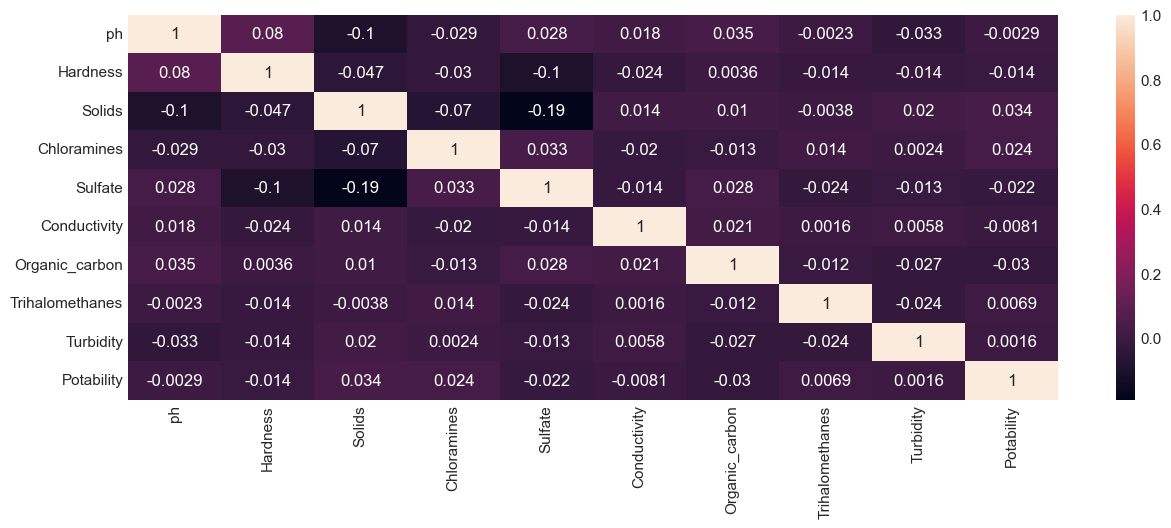

In [78]:
plt.figure(figsize=(15, 5))
sns.heatmap(new.corr(),annot=True)


In [79]:
corr_matrix = new.corr()

In [80]:
 corr_matrix["Potability"].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006918
Turbidity          0.001581
ph                -0.002920
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.022108
Organic_carbon    -0.030001
Name: Potability, dtype: float64

* The correlation coefficient ranges from –1 to 1.
* When it is close to 1, it means that there is a strong positive correlation.
* When it is close to -1, it means that there is a negative correlation.


# Relationship Between Each Variable and Target Variable (Potability)


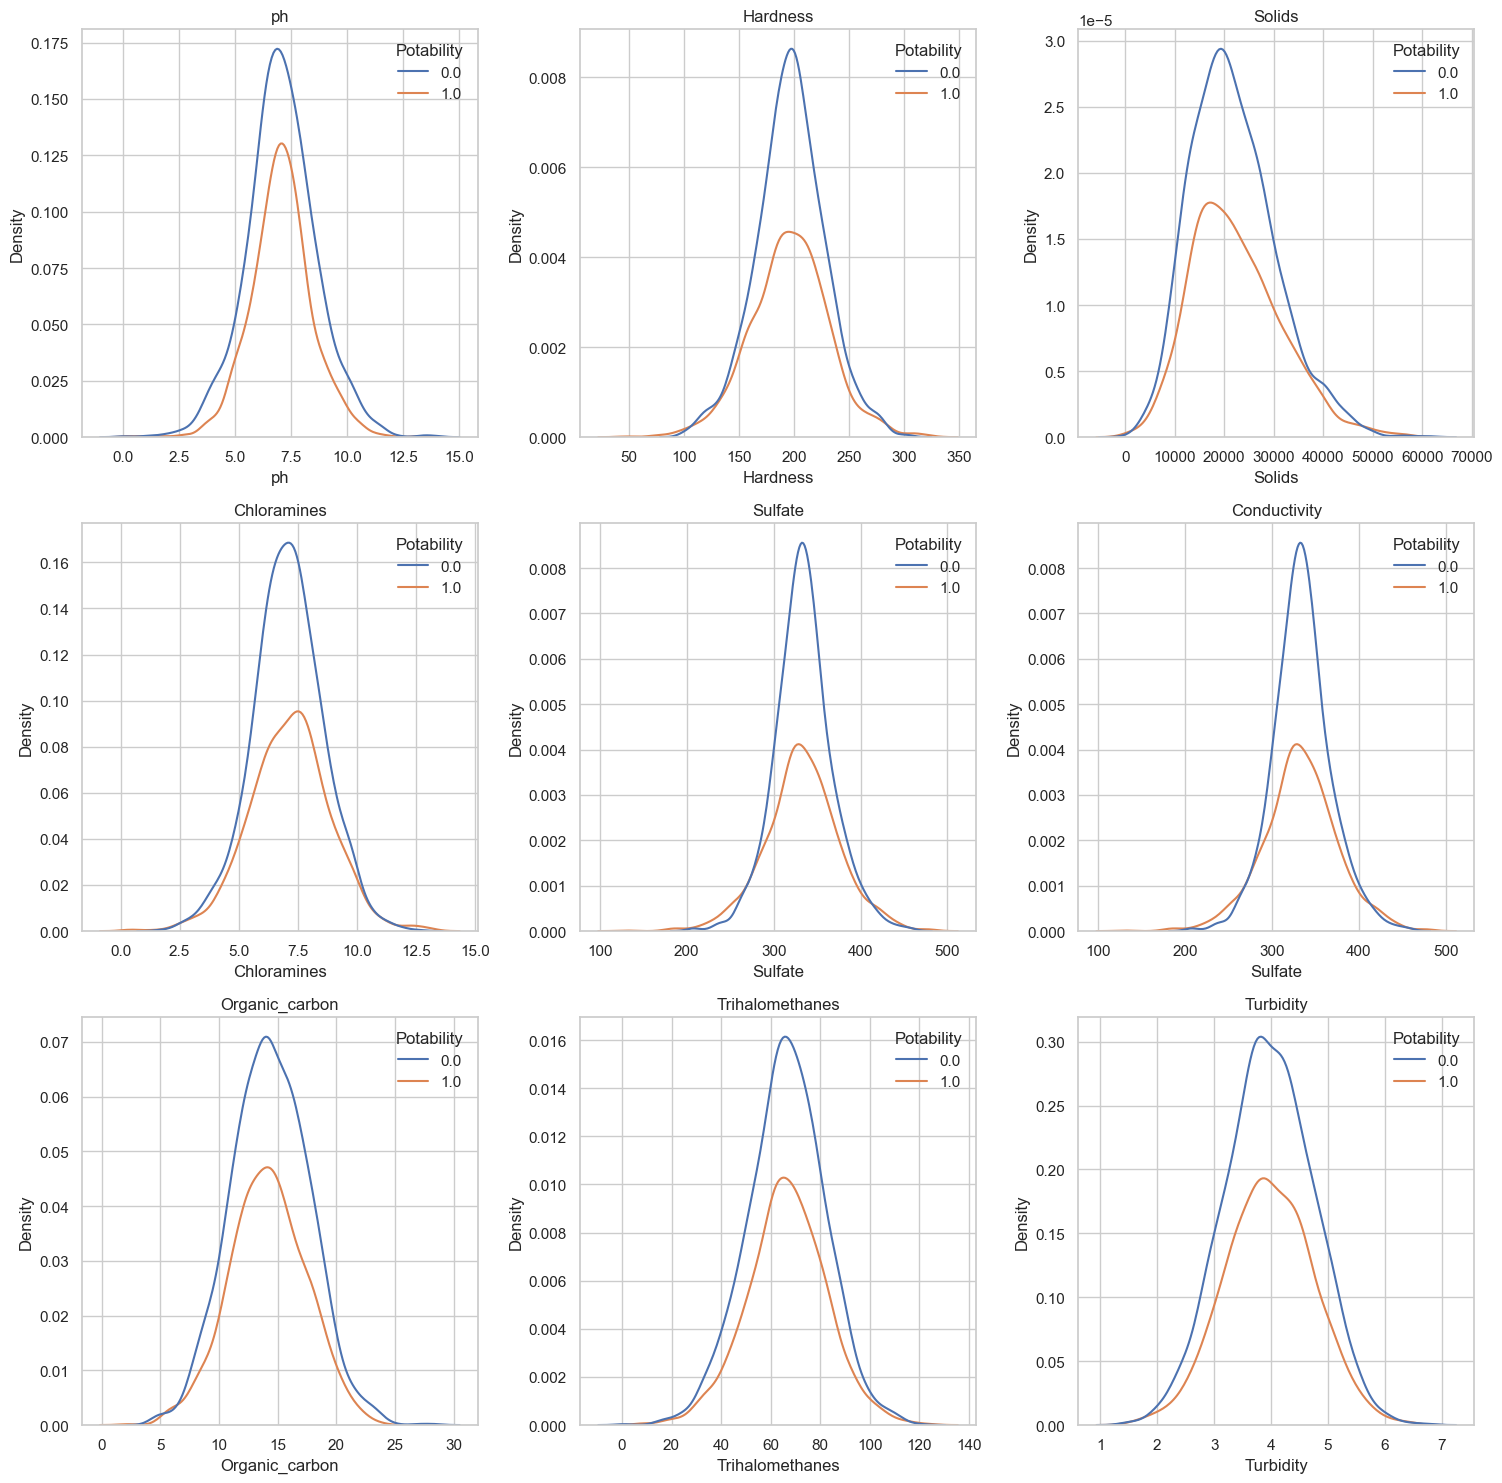

In [81]:
sns.color_palette("husl", 9)
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(3,3,1)
plt.title('ph')
sns.kdeplot(x=new['ph'],hue = new['Potability'])

plt.subplot(3,3,2)
plt.title('Hardness')
sns.kdeplot(x=new['Hardness'],hue = new['Potability'])

plt.subplot(3,3,3)
plt.title('Solids')
sns.kdeplot(x=new['Solids'],hue = new['Potability'])

plt.subplot(3,3,4)
plt.title('Chloramines')
sns.kdeplot(x=new['Chloramines'],hue = new['Potability'])

plt.subplot(3,3,5)
plt.title('Sulfate')
sns.kdeplot(x=new['Sulfate'],hue = new['Potability'])

plt.subplot(3,3,6)
plt.title('Conductivity')
sns.kdeplot(x=new['Sulfate'],hue = new['Potability'])

plt.subplot(3,3,7)
plt.title('Organic_carbon')
sns.kdeplot(x=new['Organic_carbon'],hue = new['Potability'])

plt.subplot(3,3,8)
plt.title('Trihalomethanes')
sns.kdeplot(x=new['Trihalomethanes'],hue = new['Potability'])

plt.subplot(3,3,9)
plt.title('Turbidity')
sns.kdeplot(x=new['Turbidity'],hue = new['Potability'])

plt.tight_layout()

# Outliers

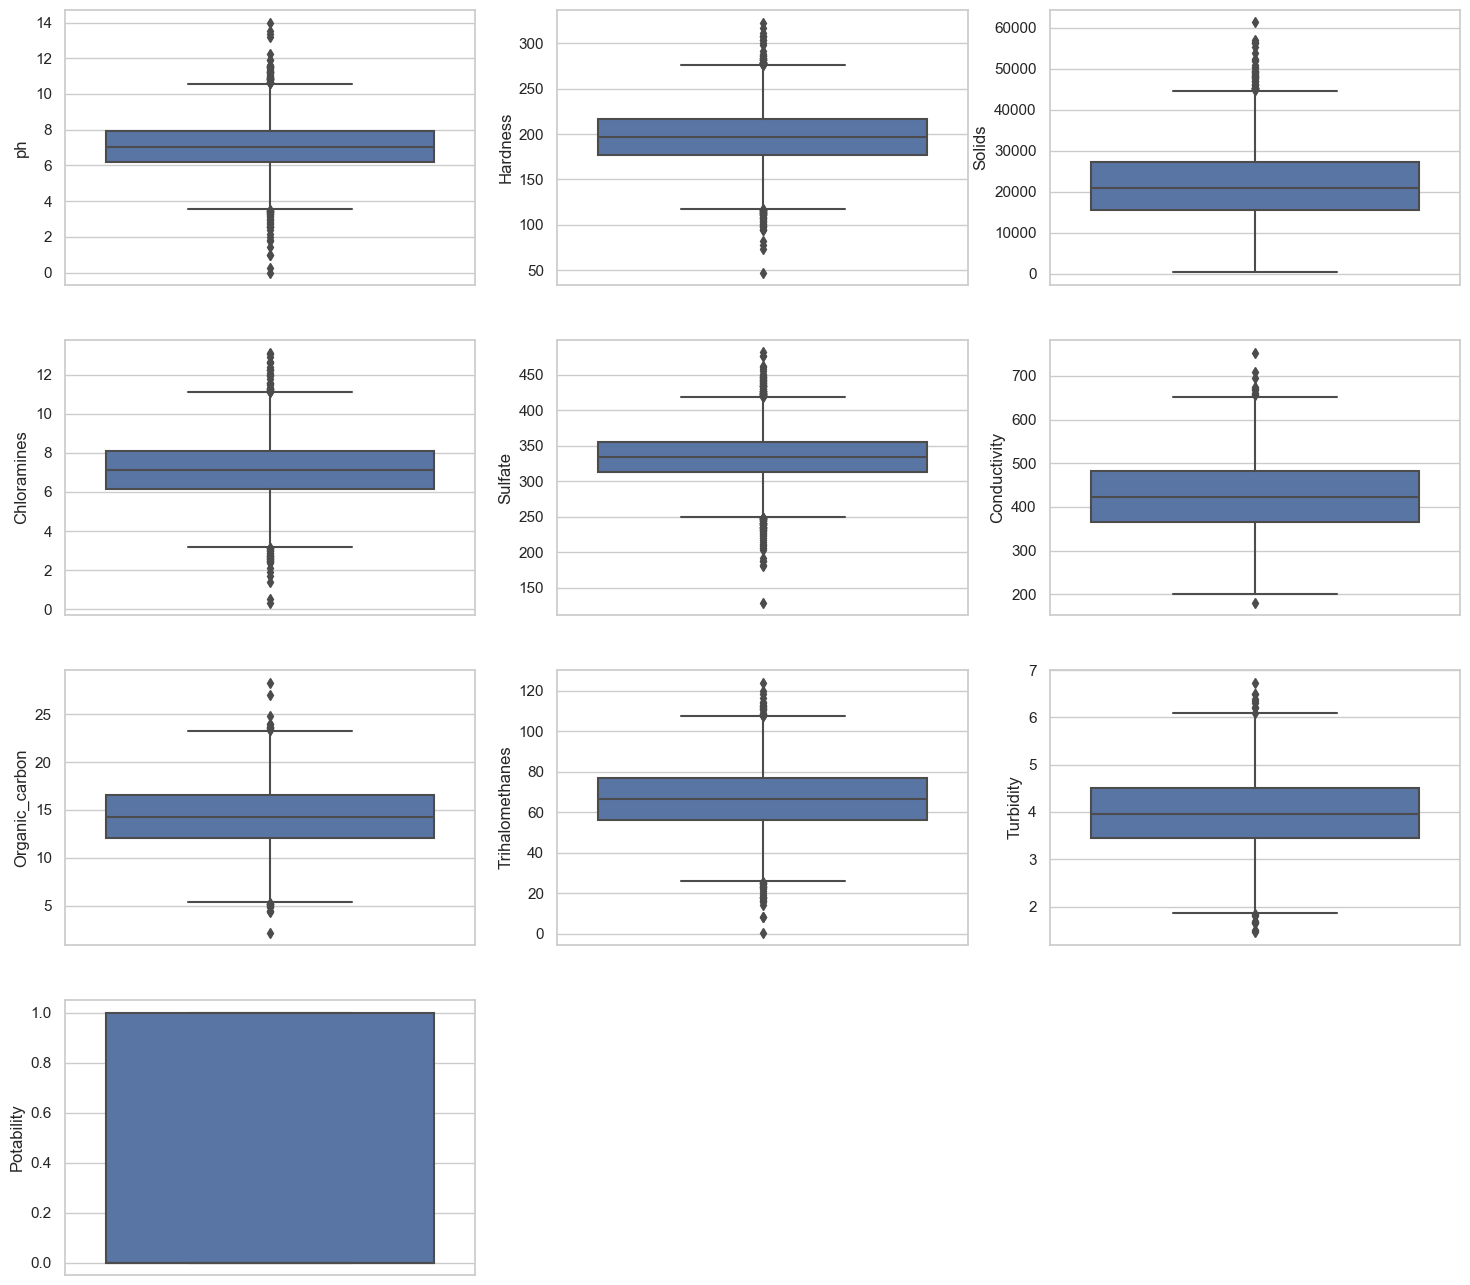

In [82]:
i=1
plt.figure(figsize=(18,25))
for feature in new.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=new[feature])
    i+=1

* There are some outliers

In [83]:
new.shape

(3276, 10)

# SCALING

* I choose to use StandardScaler because the distribution is fairly close to a normal distribution.

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = new.drop('Potability', axis=1)
y = new.Potability

In [86]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [89]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [90]:
y_train

925     0.0
3110    0.0
2287    0.0
1323    0.0
2244    0.0
       ... 
1164    1.0
500     0.0
2989    0.0
421     0.0
1829    0.0
Name: Potability, Length: 2457, dtype: float64

# Model Evaluation

# 1. Logistic Rgression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [93]:
y_pred = lr.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [95]:
confusion_matrix(y_test,y_pred)

array([[504,   0],
       [311,   4]], dtype=int64)

In [96]:
print(accuracy_score(y_test,y_pred))

0.6202686202686203


In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       504
         1.0       1.00      0.01      0.03       315

    accuracy                           0.62       819
   macro avg       0.81      0.51      0.39       819
weighted avg       0.77      0.62      0.48       819



In [98]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(lr, pickle_out)
pickle_out.close()

# 2. SVC

In [99]:
from sklearn.svm import SVC


In [100]:
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(X_train,y_train)

SVC()

In [101]:
y_pred = svc_classifier.predict(X_test)

In [102]:
confusion_matrix(y_test,y_pred)

array([[435,  69],
       [193, 122]], dtype=int64)

In [103]:
print(accuracy_score(y_test,y_pred))

0.6800976800976801


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.86      0.77       504
         1.0       0.64      0.39      0.48       315

    accuracy                           0.68       819
   macro avg       0.67      0.63      0.63       819
weighted avg       0.67      0.68      0.66       819



In [106]:
input_data = (5.783956,161.8265,29299.12,7.028797,350.4309,375.7807,19.76258,86.69846,3.497577)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The water is not potable')
else:
  print('The water is potable')


[1.]
The water is potable


In [107]:
import pickle
filename = 'water1.sav'
pickle.dump(svc_classifier , open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('water1.sav', 'rb'))